In [26]:
#get essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#get preprocessing and metric libraries
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#get the model and visualisation method
from nodegam.sklearn import NodeGAMRegressor
from nodegam.vis_utils import vis_GAM_effects
import seaborn as sns
#import the required data for visualisation from other models
%store -r alcohol_data
%store -r vol_acid_data
%store -r free_sulfur_data
%store -r nbm_alcohol
%store -r nbm_volatile
%store -r nbm_freesulf

In [6]:
#get the data
RedWineData = pd.read_csv('../../Data/Wine/winequality-red.csv', delimiter = ';')
WhiteWineData = pd.read_csv('../../Data/Wine/winequality-white.csv', delimiter = ';')
#Combine the two dataframes into one Winedata variable 
WineFrames = [RedWineData, WhiteWineData]
WineData = pd.concat(WineFrames)
#check that WineData has the right amount of rows and columns. It should have 6497 rows and 12 columns


In [7]:
#Set the target. We are trying to predict the quality of the wine based on the explanatory variables
target = WineData['quality']
x_wine = WineData.drop(['quality'], axis = 1)


In [8]:
#split the data to training and test. 
X_train, X_test, y_train, y_test = train_test_split(x_wine, target, test_size = 0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = (0.15 /(0.15 + 0.7)))
#fit the minmax scaler according to the training data. Then transform the training and test data
scaler = MinMaxScaler((-1, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_train = pd.DataFrame(data = X_train, columns = x_wine.columns)
X_test = pd.DataFrame(data = X_test, columns = x_wine.columns)


In [10]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [11]:
#create and fit the model
node_reg = NodeGAMRegressor(
            ga2m=0,
            max_steps=3000,
            device='cpu',
            in_features=11
            )
node_reg.fit(X_train, y_train)

Normalize y. mean = 5.80840275262586, std = 0.8687176926970478


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qhoptim/pyt/qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (mse)
100	0.7624	0.944
200	0.7027	0.827
300	0.7544	0.8059
400	0.8533	0.7799
500	0.6291	0.7496
600	0.6413	0.7629
700	0.6195	0.7298
800	0.6521	0.7529
900	0.6509	0.6169
1000	0.682	0.6283
1100	0.5931	0.6191
1200	0.7487	0.6076
1300	0.6128	0.5928
1400	0.6558	0.5678
1500	0.6036	0.5449
1600	0.6524	0.5453
1700	0.6369	0.5134
1800	0.6123	0.5114
1900	0.6085	0.5039
2000	0.6612	0.4994
2100	0.7326	0.4998
2200	0.6984	0.5008
2300	0.6773	0.501
2400	0.6468	0.5018
2500	0.6507	0.5006
2600	0.6698	0.4984
2700	0.6164	0.4972
2800	0.6509	0.4969
2900	0.6758	0.4959
3000	0.655	0.4957
End. It reaches the maximum steps 3000
Total training time: 546.3 seconds
Best step:  3000
Best Val Metric:  0.4957389932571043
Load the best checkpoint.


{'train_losses': [3.0096428394317627,
  1.437447428703308,
  3.618497848510742,
  3.2609431743621826,
  1.3133882284164429,
  1.773722529411316,
  1.4546499252319336,
  1.7625168561935425,
  1.6139808893203735,
  1.1860814094543457,
  0.9635210633277893,
  0.9478548169136047,
  0.9984240531921387,
  0.9220527410507202,
  1.043282151222229,
  1.072835087776184,
  1.3430030345916748,
  2.1093969345092773,
  0.9565693140029907,
  0.9609470367431641,
  1.6228545904159546,
  1.1644996404647827,
  1.0668559074401855,
  0.9206156730651855,
  2.1450576782226562,
  0.983180820941925,
  0.8673650622367859,
  0.9372357130050659,
  1.0065733194351196,
  0.9458606839179993,
  1.1699702739715576,
  1.2132856845855713,
  0.9285690188407898,
  0.8288013339042664,
  1.3054020404815674,
  1.5407062768936157,
  0.8665699362754822,
  0.93738853931427,
  1.2720005512237549,
  0.8604567050933838,
  0.8472481966018677,
  0.7747337818145752,
  0.830362856388092,
  0.8911441564559937,
  0.8884207606315613,
  0

In [12]:
predictions = node_reg.predict(X_test)
rmse_score = sk_metrics.mean_squared_error(y_test, predictions, squared=False)
print("rmse score for the model is: ", rmse_score)

rmse score for the model is:  0.7126716782663869


In [17]:
visualisation_data = node_reg.get_GAM_df(X_train)

bin features residual sugar with uniq val 304 to only 256
bin features total sulfur dioxide with uniq val 272 to only 256
bin features density with uniq val 952 to only 256


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:

Finish "Run values through model" in 207ms


100%|██████████| 11/11 [00:00<00:00, 952.96it/s]


Finish "Extract values" in 17ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 2ms


100%|██████████| 12/12 [00:00<00:00, 3866.01it/s]

Finish "Construct table" in 16ms


bin features residual sugar with uniq val 304 to only 256
bin features total sulfur dioxide with uniq val 272 to only 256
bin features density with uniq val 952 to only 256


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:

Finish "Run values through model" in 204ms


100%|██████████| 11/11 [00:00<00:00, 1216.29it/s]


Finish "Extract values" in 12ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms


100%|██████████| 12/12 [00:00<00:00, 16352.06it/s]

Finish "Construct table" in 3ms


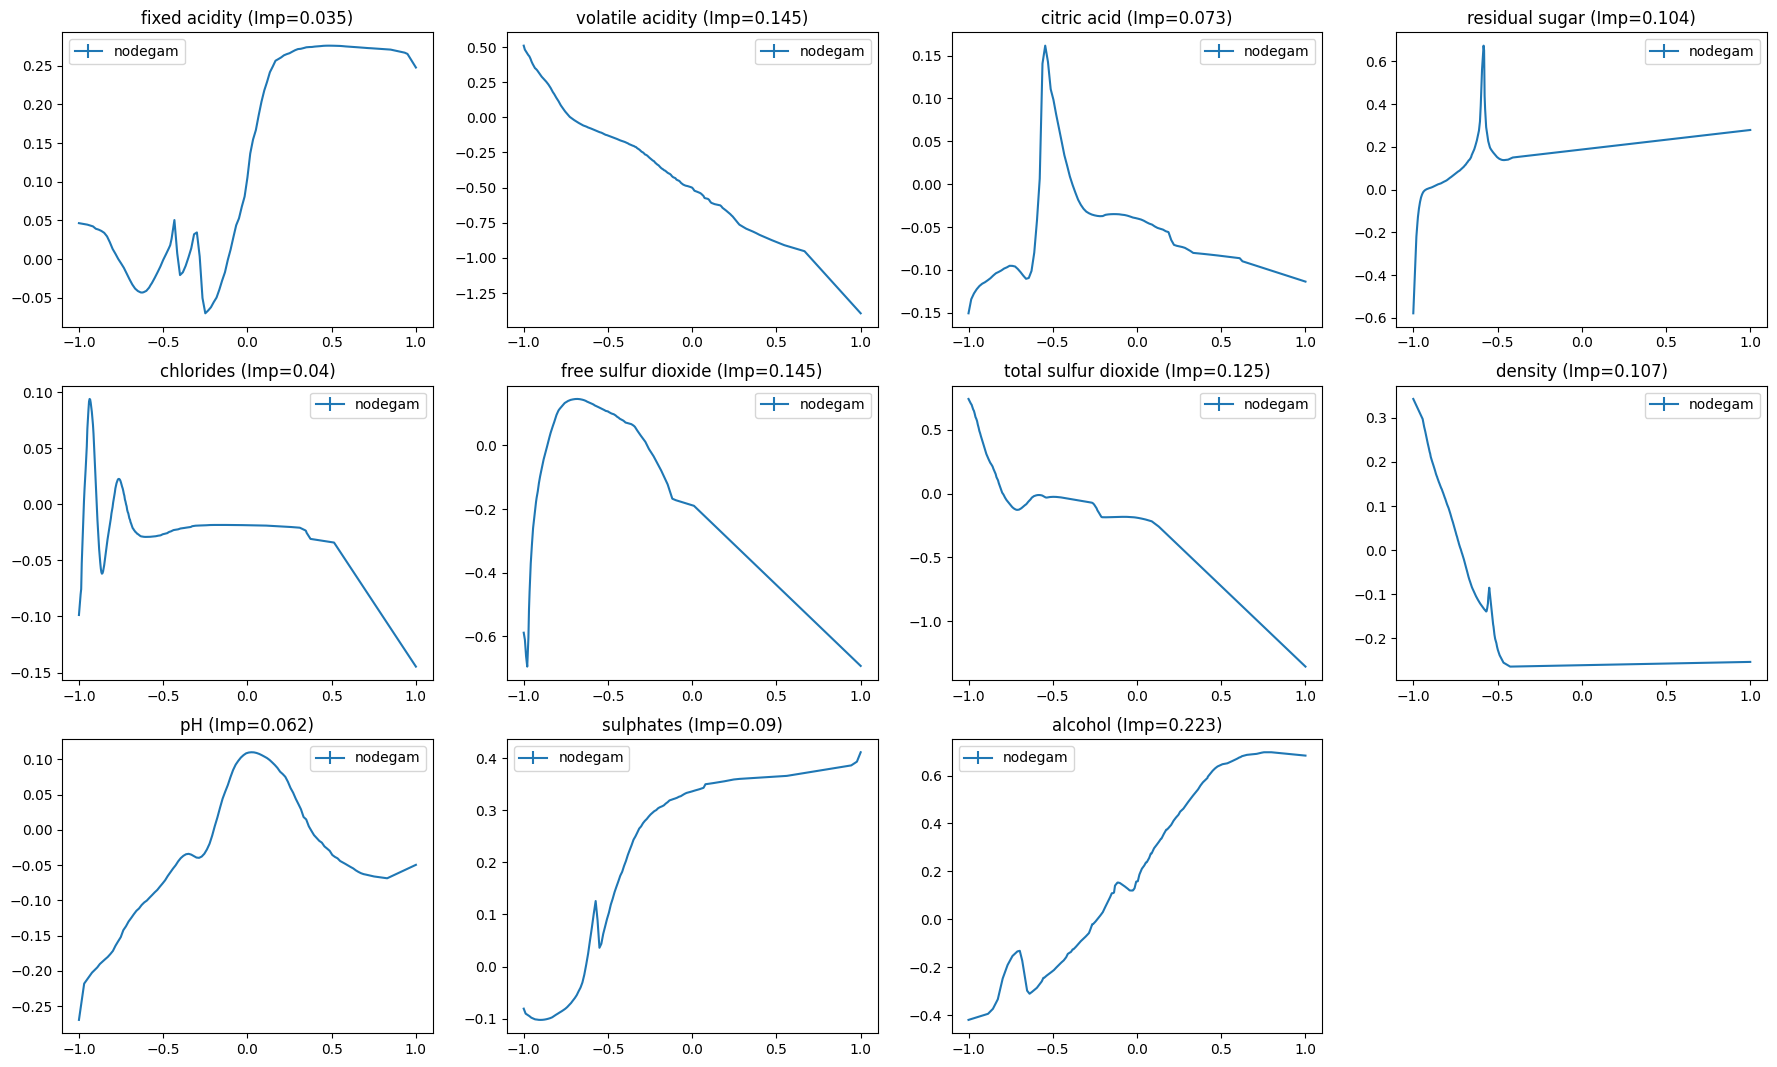

In [14]:
fig, ax = vis_GAM_effects({'nodegam': node_reg.get_GAM_df(X_train)}, top_interactions=0)


In [130]:
WineData['volatile acidity'].sort_values()

968     0.080
1475    0.080
1480    0.080
973     0.080
3652    0.085
        ...  
690     1.185
672     1.240
126     1.330
127     1.330
1299    1.580
Name: volatile acidity, Length: 6497, dtype: float64

In [16]:
#set up the nam lines
nam_alc_linefit = np.poly1d(np.polyfit(alcohol_data['x'], alcohol_data['y'], 8))
nam_sulf_linefit = np.poly1d(np.polyfit(free_sulfur_data['x'], free_sulfur_data['y'], 8))
nam_acid_linefit = np.poly1d(np.polyfit(vol_acid_data['x'], vol_acid_data['y'], 8))

In [27]:
nbm_alc_linefit = np.poly1d(np.polyfit(nbm_alcohol['x'], nbm_alcohol['y'], 8))
nbm_vol_linefit = np.poly1d(np.polyfit(nbm_volatile['x'], nbm_volatile['y'], 8))
nbm_sulf_linefit = np.poly1d(np.polyfit(nbm_freesulf['x'], nbm_freesulf['y'], 8))


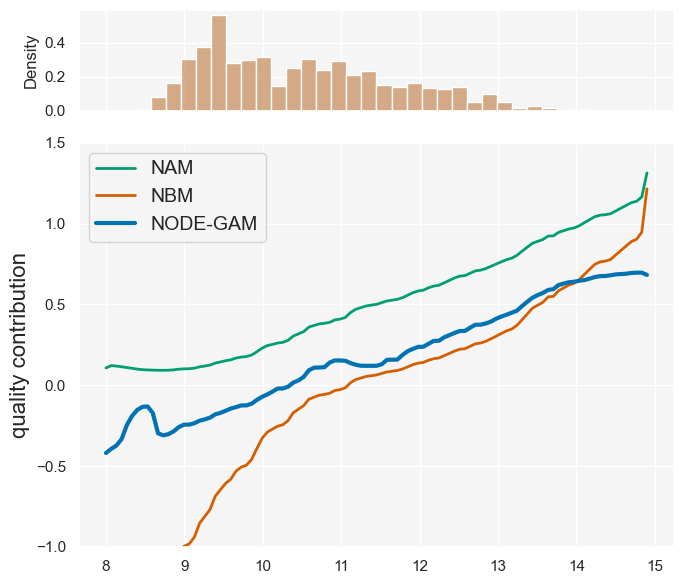

In [40]:
sns.set_theme()
colorblind_colors = sns.color_palette("colorblind")
sns.set_style(rc = {'axes.facecolor': 'whitesmoke'})
alc_visualisation = visualisation_data[visualisation_data['feat_name'] == 'alcohol']
alcohol_values = np.linspace(WineData['alcohol'].min(), WineData['alcohol'].max(), len(alc_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         figsize=(7, 6),
                         sharex=True,  
                         gridspec_kw=dict(height_ratios = [1, 4])
                    )
axes[1].plot(alcohol_values, nam_alc_linefit(alc_visualisation['x'].iloc[0]), color = colorblind_colors[2], linewidth = 2, label = 'NAM')
axes[1].plot(alcohol_values, nbm_alc_linefit(alc_visualisation['x'].iloc[0]), color = colorblind_colors[3], linewidth = 2, label = 'NBM')
axes[1].plot(alcohol_values, alc_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3, label = 'NODE-GAM')

sns.histplot(WineData['alcohol'], stat = 'density', ax = axes[0], color = colorblind_colors[5])
#plt.xlim(7.8, 15)
plt.ylim(-1, 1.5)
#plt.xlabel('alcohol (% of volume)', fontsize = 14)
plt.ylabel('quality contribution', fontsize = 16)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.show()


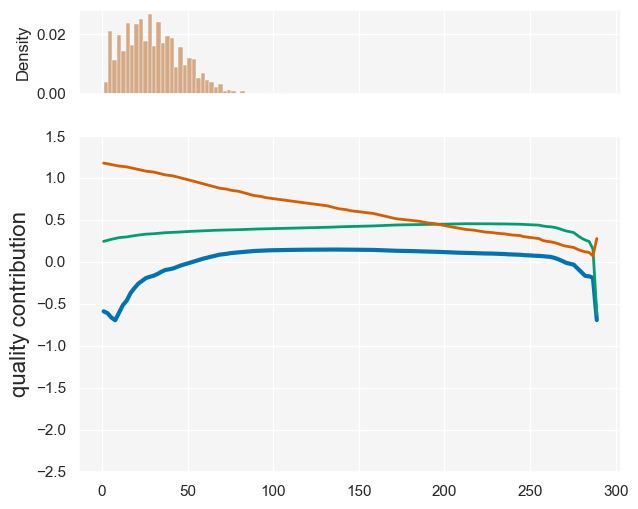

In [41]:
sulfur_visualisation = visualisation_data[visualisation_data['feat_name'] == 'free sulfur dioxide']
sulfur_values = np.linspace(WineData['free sulfur dioxide'].min(), WineData['free sulfur dioxide'].max(), len(sulfur_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         sharex=True, 
                         figsize = (7, 6),
                         gridspec_kw=dict(height_ratios = [1, 4])
            )
axes[1].plot(sulfur_values, sulfur_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3)
axes[1].plot(sulfur_values, nam_sulf_linefit(sulfur_visualisation['x'].iloc[0]),color = colorblind_colors[2], linewidth = 2)
axes[1].plot(sulfur_values, nbm_sulf_linefit(sulfur_visualisation['x'].iloc[0]),color = colorblind_colors[3], linewidth = 2)

sns.histplot(WineData['free sulfur dioxide'], stat = 'density', ax = axes[0], color = colorblind_colors[5])
plt.ylim(-2.5, 1.5)
#plt.xlabel('free sulfur dioxide (mg/$dm^3$)', fontsize = 14)
plt.ylabel('quality contribution', fontsize = 16)
plt.show()


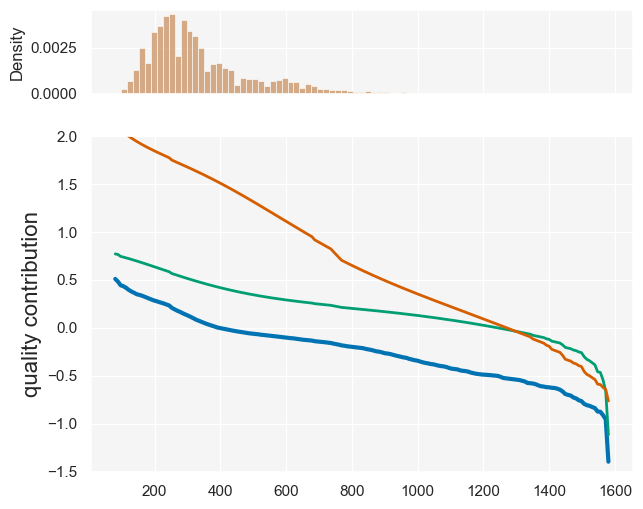

In [42]:
acid_visualisation = visualisation_data[visualisation_data['feat_name'] == 'volatile acidity']
acid_values = np.linspace(WineData['volatile acidity'].min() * 1000, WineData['volatile acidity'].max() * 1000, len(acid_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         sharex=True, 
                         figsize = (7, 6),
                         gridspec_kw=dict(height_ratios = [1, 4])
            )
axes[1].plot(acid_values, acid_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3)
axes[1].plot(acid_values, nam_acid_linefit(acid_visualisation['x'].iloc[0]),color = colorblind_colors[2], linewidth = 2)
axes[1].plot(acid_values, nbm_vol_linefit(acid_visualisation['x'].iloc[0]),color = colorblind_colors[3], linewidth = 2)

sns.histplot(WineData['volatile acidity'] * 1000, stat = 'density', ax = axes[0], color = colorblind_colors[5])

plt.ylim(-1.5, 2)
#plt.xlabel('volatile acidity (mg/$dm^3$)', fontsize = 14)
plt.ylabel('quality contribution', fontsize = 16)

plt.show()